In [1]:
import random as rd 
import os
import re
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import colors
import simulations
import stability_diagrams as sd

In [13]:
alpha=0.2
alpha_p=0.0
w=0.4

beta=0.4
beta_p=0.1

b=1
q=0.0
pert=rd.uniform(-10**(-6),10**(-6))

sim_args = simulations.variables_simulation(alpha, alpha_p, beta, beta_p, w, q, b, pert)
sim = simulations.simulation(**sim_args)
p_eq_0,g_eq_0=simulations.compute_equilibrium(sim)
print(sim.prices[-1])


P_EQ [ 1.66666667]
G_EQ [ 2.]
[ 1.66666667]


In [14]:
lag=1
y_axis=sd.compute_conv_log_thresh(sim, lag)
print(y_axis)

thresh_1= -3.8633961807477135e-08  thresh_2= -3.8633961807477135e-08
index de thresh_1= 0 index de thresh_2= 0
0


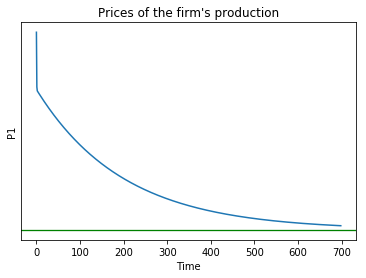

In [15]:
### Prices
fig, ax = plt.subplots()
ax.set_title("Prices of the firm's production")
ax.set_xlabel('Time')
ax.set_ylabel('P1')

ax.plot(sim.prices[1:-1])

plt.axhline(y=p_eq_0,linewidth=1.3, alpha=1, color="green", label="p=p_eq")
#plt.axhline(y=p_eq_1,linewidth=1.3, alpha=1, color="red", label="p=p_eq")
#plt.xscale("linear")
#plt.axhline(y=1.5, linewidth=1.3, alpha=1, color="red", label="p=p_eq")
ax.set_yscale("log")

#plt.grid(True)
plt.show()

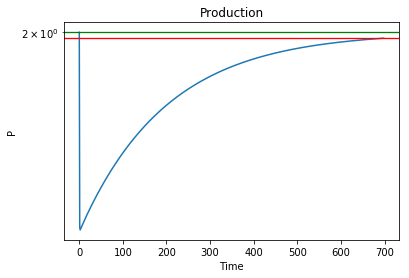

In [16]:
### Production
fig, ax = plt.subplots()
ax.set_title("Production")
ax.set_xlabel('Time')
ax.set_ylabel("P")

prod=[sim.eco.production_function(sim.Q_real[i, :, 1]) for i in range(len(sim.Q_real))]

ax.plot(prod[1:-1])

plt.axhline(y=g_eq_0,linewidth=1.3, alpha=1, color="green", label="prod=prod_eq")
plt.axhline(y=sim.eco.production_function(sim.Q_real[-2, :, 1]),linewidth=1.3, alpha=1, color="red", label="prod=prod_eq")

#plt.xscale("linear")s
ax.set_yscale("log")
#ax.set_ylim(0,float(max(prod))+100)
#plt.grid(True)
plt.show()

#directoire="/Users/boisselcamille/Documents/Stage_Econophysix/networks_code/OneFirmCase_Images_v1/2020_08_20_PerturbationsEquilibres_b<1_q=0/"+str(compteur)+"prods_b="+str(econ_args["b"])+"_q="+str(econ_args["q"])+"_"+state+".png"                
#fig.savefig(directoire)

In [17]:
values=[i/10 for i in range(5)]
values_alpha=[0.2]
values_beta_p=[0.1]
values_w=[0.4]
q=0
b=1
pert=rd.uniform(-10**(-5),10**(-5))
#directoire="/Users/boisselcamille/Documents/Stage_Econophysix/networks_code/OneFirmCase_Images_v1/2020_09_04_Scenarii_b="+str(b)+"_q="+str(q) 
#os.mkdir(directoire)   
directoire="/mnt/research-live/user/cboissel/network-economy/2020_09_04_Scenarii_b="+str(b)+"_q="+str(q) 
#os.mkdir(directoire)                
behaviour_conv={}
behaviour_dist_eq={}
conv_sim={}
for alpha in values_alpha:
    for alpha_p in values:
        for w in values_w:
            for beta in values:
                for beta_p in values_beta_p:
                    scenario="alpha="+str(alpha)+"_alpha_p="+str(alpha_p)+"_beta="+str(beta)+"_beta_p="+str(beta_p)+"_w="+str(w)         
                    print(scenario)
                    sim_args=simulations.variables_simulation(alpha,alpha_p,beta,beta_p,w,q,b,pert)
                    sim=simulations.simulation(**sim_args)
                    #Plot_PricesEq(sim, p_eq_0)
                    #Plot_ProductionEq(sim, p_eq_0)
                    p_eq_0,g_eq_0=simulations.compute_equilibrium(sim)
                    print(sd.rolling_diff(sim))
                    conv_sim[scenario] = sd.rolling_diff(sim)
                    behaviour_dist_eq[scenario] = sd.compute_dist_eq_log_thresh(sim, p_eq_0, g_eq_0, 1)
                    behaviour_conv[scenario] = sd.compute_conv_log_thresh(sim, 1)
#pd.DataFrame.from_dict(behaviour_conv, orient="index").to_csv(directoire+'/11_LogValuesConv.csv', header=False, index=range(len(behaviour_conv)))
#pd.DataFrame.from_dict(behaviour_dist_eq, orient="index").to_csv(directoire+'/11_LogValuesDistEq.csv', header=False, index=range(len(behaviour_dist_eq)))

alpha=0.2_alpha_p=0.0_beta=0.0_beta_p=0.1_w=0.4
P_EQ [ 1.66666667]
G_EQ [ 2.]
False
alpha=0.2_alpha_p=0.0_beta=0.1_beta_p=0.1_w=0.4
P_EQ [ 1.66666667]
G_EQ [ 2.]
False
alpha=0.2_alpha_p=0.0_beta=0.2_beta_p=0.1_w=0.4
P_EQ [ 1.66666667]
G_EQ [ 2.]
False
alpha=0.2_alpha_p=0.0_beta=0.3_beta_p=0.1_w=0.4
P_EQ [ 1.66666667]
G_EQ [ 2.]
False
alpha=0.2_alpha_p=0.0_beta=0.4_beta_p=0.1_w=0.4
P_EQ [ 1.66666667]
G_EQ [ 2.]
True
thresh_1= 1.117430365449936e-06  thresh_2= 8.371540509097931e-07
index de thresh_1= 0 index de thresh_2= 1
thresh_1= 2.1860609233925743e-07  thresh_2= 2.1860609233925743e-07
index de thresh_1= 0 index de thresh_2= 0
alpha=0.2_alpha_p=0.1_beta=0.0_beta_p=0.1_w=0.4
P_EQ [ 1.66666667]
G_EQ [ 2.]
False
alpha=0.2_alpha_p=0.1_beta=0.1_beta_p=0.1_w=0.4
P_EQ [ 1.66666667]
G_EQ [ 2.]
False
alpha=0.2_alpha_p=0.1_beta=0.2_beta_p=0.1_w=0.4
P_EQ [ 1.66666667]
G_EQ [ 2.]
False
alpha=0.2_alpha_p=0.1_beta=0.3_beta_p=0.1_w=0.4
P_EQ [ 1.66666667]
G_EQ [ 2.]
False
alpha=0.2_alpha_p=0.1_beta=0.

In [20]:
def plot_stabilitydiagramm_bool(data_diagramme_x, data_diagramme_y,
                               data_diagramme_be, title, values, directoire):
    """
    Function used for plotting the stability diagrams.
    :param data_diagramme_x: timescale x values
    :param data_diagramme_y: timescale y values
    :param data_diagramme_be: prices' long term behaviour for given (x,y)
    :param title: string, describes the set of parameters used in the sim.
    :param directoire: string, file used to save figures.
    :return: the saved plot
    """
    coordonnees = {}
    for i in range(len(values)):
        coordonnees[values[i]] = i
    data_slope = np.zeros((len(values), len(values)))
    for i in range(len(values)**2):
        data_slope[coordonnees[data_diagramme_y[i]],
                   coordonnees[data_diagramme_x[i]]] = data_diagramme_be[i]
    y, x = np.mgrid[0:len(values)+1, 0:len(values)+1]/10
    fig, ax = plt.subplots()
    threshold=max(abs(min(data_diagramme_be)),abs(max(data_diagramme_be)))
    im = ax.pcolor(x, y, data_slope, cmap='RdBu_r', vmin=-threshold, vmax=threshold)
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_title("k")
    ax.set_title(title)
    ax.set_xlabel(r"$\beta_p$")
    ax.set_ylabel(r"$w$")
    fig.tight_layout()
    fig.show()
    fig.savefig(directoire+"/"+title+".png")
    
values=[i/10 for i in range(5)]
values_alpha=[0.2]
values_beta_p=[0.1]
values_w=[0.4]
q=0
b=1
directoire="/mnt/research-live/user/cboissel/network-economy/2020_09_04_Scenarii_b="+str(b)+"_q="+str(q)+"/BoolMethod/Alpha_pBeta"
os.mkdir(directoire)
for alpha in values_alpha:
    for beta_p in values_beta_p:
        for w in values_w:
            data_diagramme_x=[]
            data_diagramme_y=[]       
            data_diagramme_be_conv=[]
            data_conv=[]
            for key in conv_sim:
                if "alpha="+str(alpha)+"_" in key and "beta_p="+str(beta_p)+"_" in key and re.search("w="+str(w)+"$", key):
                    x_axis=float(re.findall(r'beta=(\d+\.?\d*)_',key)[0])
                    y_axis=float(re.findall(r'alpha_p=(\d+\.?\d*)_',key)[0])
                    data_diagramme_x.append(x_axis)
                    data_diagramme_y.append(y_axis)
                    data_diagramme_be_conv.append(conv_sim[key])
                    data_conv.append(behaviour_dist_eq[key])
            data_diagramme_be_conv_bool=[0 if i else 1 for i in data_diagramme_be_conv]
            title="Stability Diagram. \n alpha="+str(alpha)+"_"+"beta_p="+str(beta_p)+"_"+"w="+str(w) 
            plot_stabilitydiagramm_bool(data_diagramme_x, data_diagramme_y, data_diagramme_be_conv_bool, title+"_conv_bool", values, directoire)
            plot_stabilitydiagramm_bool(data_diagramme_x, data_diagramme_y, data_conv, title+"_conv", values, directoire)
                


In [15]:
print(data_diagramme_x)
print(data_diagramme_be_conv_bool)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.0, 0.1, 0.2, 0.3, 0.4, 0.0, 0.1, 0.2, 0.3, 0.4, 0.0, 0.1, 0.2, 0.3, 0.4, 0.0, 0.1, 0.2, 0.3, 0.4]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]


In [30]:
def plot_stabilitydiagramm_exp(data_diagramme_x, data_diagramme_y,
                               data_diagramme_be, title, values, directoire):
    """
    Function used for plotting the stability diagrams.
    :param data_diagramme_x: timescale x values
    :param data_diagramme_y: timescale y values
    :param data_diagramme_be: prices' long term behaviour for given (x,y)
    :param title: string, describes the set of parameters used in the sim.
    :param directoire: string, file used to save figures.
    :return: the saved plot
    """
    coordonnees = {}
    for i in range(len(values)):
        coordonnees[values[i]] = i
    data_slope = np.zeros((len(values), len(values)))
    for i in range(len(values)**2):
        data_slope[coordonnees[data_diagramme_y[i]],
                   coordonnees[data_diagramme_x[i]]] = data_diagramme_be[i]
    fig, ax = plt.subplots()
    y, x = np.mgrid[0:5, 0:5]/10
    threshold=max(abs(min(data_diagramme_be)),abs(max(data_diagramme_be)))
    im = ax.pcolor(x, y, data_slope, cmap='RdBu_r', vmin=-threshold, vmax=threshold)
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_title("k")
    ax.set_title(title)
    ax.set_xlabel(r"$\beta$")
    ax.set_ylabel(r"$\alpha_p$")
    fig.tight_layout()
    fig.show()
    fig.savefig(directoire+"/"+title+".png")

In [31]:
values=[i/10 for i in range(5)]
values_alpha=[]
values_alpha_p=[]
values_w=[]
q=0
b=1
directoire="/mnt/research-live/user/cboissel/network-economy/2020_09_04_Scenarii_b="+str(b)+"_q="+str(q)+"/LogMethod_short/Alpha_pBeta"
os.mkdir(directoire)
for alpha in values:
    for beta_p in values:
        for w in values:
            data_diagramme_x=[]
            data_diagramme_y=[]       
            data_diagramme_be_conv=[] 
            data_diagramme_be_dist_eq=[] 
            for key in behaviour_conv:
                if "alpha="+str(alpha)+"_" in key and "beta_p="+str(beta_p)+"_" in key and re.search("w="+str(w)+"$", key):
                    x_axis=float(re.findall(r'beta=(\d+\.?\d*)_',key)[0])
                    y_axis=float(re.findall(r'alpha_p=(\d+\.?\d*)_',key)[0])
                    data_diagramme_x.append(x_axis)
                    data_diagramme_y.append(y_axis)
                    data_diagramme_be_conv.append(behaviour_conv[key])
                    data_diagramme_be_dist_eq.append(behaviour_dist_eq[key])
            nb_be=len(set(data_diagramme_be_conv))
            title="Stability Diagram. \n alpha="+str(alpha)+"_"+"beta_p="+str(beta_p)+"_"+"w="+str(w) 
            plot_stabilitydiagramm_exp(data_diagramme_x, data_diagramme_y, data_diagramme_be_conv, title+"_conv", values, directoire)
            plot_stabilitydiagramm_exp(data_diagramme_x, data_diagramme_y, data_diagramme_be_dist_eq, title+"_dist_eq", values, directoire)
            

In [9]:
directoire="/mnt/research-live/user/cboissel/network-economy/2020_09_04_Scenarii_b="+str(b)+"_q="+str(q)+"/LogMethod_short"
os.mkdir(directoire)

In [66]:
values=[i/10 for i in range(5)]
values_alpha=[]
values_alpha_p=[]
values_w=[]
q=0
b=1

for alpha in values:
    for alpha_p in values:
        for beta in values:
            data_diagramme_x=[]
            data_diagramme_y=[]       
            data_diagramme_be_conv=[] 
            data_diagramme_be_dist_eq=[] 
            for key in behaviour_conv:
                if "alpha="+str(alpha)+"_" in key and "alpha_p="+str(alpha_p)+"_" in key and "beta="+str(beta)+"_" in key:#re.search("w="+str(w)+"$", key):
                    x_axis=float(re.findall(r'beta_p=(\d+\.?\d*)_',key)[0])
                    y_axis=float(re.findall(r'w=(\d+\.?\d*)',key)[0])
                    data_diagramme_x.append(x_axis)
                    data_diagramme_y.append(y_axis)
                    data_diagramme_be_conv.append(behaviour_conv[key])
                    data_diagramme_be_dist_eq.append(behaviour_dist_eq[key])
            print(data_diagramme_be_conv)
            print(data_diagramme_be_dist_eq)
            nb_be=len(set(data_diagramme_be_conv))
          

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]
[5.8453666082370167e-06, 9.1307356296740164e-06, 9.1307356310386491e-06, 9.1307356313798086e-06, 9.1307356318915452e-06, 5.6018092035561541e-06, 1.0, 1.0, 1.0, 1.0, 5.3582518701509439e-06, 1.0, 1.0, 1.0, 1.0, 5.1146946075773274e-06, 1.0, 1.0, 1.0, 1.0, 4.8711374165014673e-06, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 2.2204460492503131e-16, 0.12149065668880073, 1.0, 1.0, 1.0, 4.4408920985006262e-16, 1.0, 1.0, 1.0, 1.0, 6.6613381477509402e-16, 1.0, 1.0, 1.0, 1.0, 8.8817841970012523e-16, 1.0, 1.0, 1.0, 1.0]
[5.8453666082370167e-06, 6.8168061856129617e-06, 7.4857138658053953e-06, 7.8641262930657638e-06, 8.1029399627995575e-06, 5.845366540069323e-06, 0.99931933903816084, 1.0, 1.0, 1.0, 5.845366537182744e-06, 1.0, 1.0, 1.0, 1.0, 5.845366494550179e-06, 1.0, 1.0, 1.0, 1.0, 5.8453665176428179e-06, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 2.2204460492503131e-16,

In [65]:
directoire="/mnt/research-live/user/cboissel/network-economy/2020_09_04_Scenarii_b="+str(b)+"_q="+str(q)+"/TanhMethod_short"
def plot_stabilitydiagramm_exp(data_diagramme_x, data_diagramme_y,
                               data_diagramme_be, title, values, directoire):
    """
    Function used for plotting the stability diagrams.
    :param data_diagramme_x: timescale x values
    :param data_diagramme_y: timescale y values
    :param data_diagramme_be: prices' long term behaviour for given (x,y)
    :param title: string, describes the set of parameters used in the sim.
    :param directoire: string, file used to save figures.
    :return: the saved plot
    """
    coordonnees = {}
    for i in range(len(values)):
        coordonnees[values[i]] = i
    data_slope = np.zeros((len(values), len(values)))
    for i in range(len(values)**2):
        data_slope[coordonnees[data_diagramme_y[i]],
                   coordonnees[data_diagramme_x[i]]] = data_diagramme_be[i]
        print("COORDONNEES", coordonnees[data_diagramme_y[i]], coordonnees[data_diagramme_x[i]], data_diagramme_be[i])
    y, x = np.mgrid[0:len(values)+1, 0:len(values)+1]/10
    print(data_slope)
    im = ax.pcolor(x, y, data_slope, cmap='RdBu_r')
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_title("k")
    ax.set_title(title)
    ax.set_xlabel(r"$\beta_p$")
    ax.set_ylabel(r"$w$")
    fig.tight_layout()
    fig.show()
    fig.savefig(directoire+"/"+title+".png")
    
    
values=[i/10 for i in range(5)]
values_alpha=[]
values_alpha_p=[]
values_w=[]
q=0
b=1

for alpha in values:
    for alpha_p in values:
        for beta in values:
            data_diagramme_x=[]
            data_diagramme_y=[]       
            data_diagramme_be_conv=[] 
            data_diagramme_be_dist_eq=[] 
            for key in behaviour_conv:
                if "alpha="+str(alpha)+"_" in key and "alpha_p="+str(alpha_p)+"_" in key and "beta="+str(beta)+"_" in key:#re.search("w="+str(w)+"$", key):
                    x_axis=float(re.findall(r'beta_p=(\d+\.?\d*)_',key)[0])
                    y_axis=float(re.findall(r'w=(\d+\.?\d*)',key)[0])
                    data_diagramme_x.append(x_axis)
                    data_diagramme_y.append(y_axis)
                    data_diagramme_be_conv.append(behaviour_conv[key])
                    data_diagramme_be_dist_eq.append(behaviour_dist_eq[key])
            nb_be=len(set(data_diagramme_be_conv))
            plot_stabilitydiagramm_exp(data_diagramme_x, data_diagramme_y, data_diagramme_be_conv, title+"_conv", values, directoire)


COORDONNEES 0 0 0.0
COORDONNEES 0 1 0.0
COORDONNEES 0 2 0.0
COORDONNEES 0 3 0.0
COORDONNEES 0 4 0.0
COORDONNEES 1 0 0.0
COORDONNEES 1 1 1.0
COORDONNEES 1 2 1.0
COORDONNEES 1 3 1.0
COORDONNEES 1 4 1.0
COORDONNEES 2 0 0.0
COORDONNEES 2 1 1.0
COORDONNEES 2 2 1.0
COORDONNEES 2 3 1.0
COORDONNEES 2 4 1.0
COORDONNEES 3 0 0.0
COORDONNEES 3 1 1.0
COORDONNEES 3 2 1.0
COORDONNEES 3 3 1.0
COORDONNEES 3 4 1.0
COORDONNEES 4 0 0.0
COORDONNEES 4 1 1.0
COORDONNEES 4 2 1.0
COORDONNEES 4 3 1.0
COORDONNEES 4 4 1.0
[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.]]


ValueError: left cannot be >= right

In [64]:
len(data_diagramme_x)

125

In [58]:
len(values)

5